In [13]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from copy import deepcopy
from torch import nn,optim
from sklearn.model_selection import KFold 

### define a easy liner model

In [7]:
class linear_model(nn.Module):
    def __init__(self,degree):
        super(linear_model,self).__init__()
        self.linear = nn.Linear(degree,1)
        nn.init.constant_(self.linear.weight,0)
        nn.init.constant_(self.linear.bias,0)
    
    #前向传播
    def forward(self,x):
        out = self.linear(x)
        return out

### randomly generate y = sin(x)

In [8]:
from sklearn.model_selection import train_test_split
x=np.random.uniform(-1,1,100000)
e=np.random.normal(0,0.4,100000)
y=np.sin(2*x)-x+e
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.75,random_state=2)
x_train=torch.tensor(train_x,dtype=torch.float32).reshape(-1,1)
x_test=torch.tensor(test_x,dtype=torch.float32).reshape(-1,1)
y_train=torch.tensor(train_y,dtype=torch.float32).reshape(-1,1)
y_test=torch.tensor(test_y,dtype=torch.float32).reshape(-1,1)

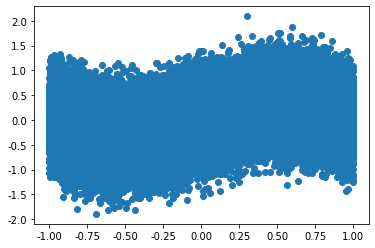

In [9]:
#这里的数据点必须设置较大才能凸显出模型的大致形状
plt.scatter(x,y)

### train

In [47]:
def train_fn(x_train,x_test,y_train,y_test,degree,is_print=False):
    '''
    degree 表示特征维度
    '''
    loss_list=[]
    loss_test_list=[]
    lossf=nn.MSELoss()
    model=linear_model(degree)#模型初始化
    optimizer=optim.Adam(model.parameters(),lr=0.01)
    for i in range(5001):
        out=model(x_train)
        out_pre=model(x_test)
        loss=lossf(out,y_train)
        loss_list.append(loss)
        loss_test=lossf(out_pre,y_test)
        loss_test_list.append(loss_test)
        optimizer.zero_grad()#将网络中所有模型的参数设置为0
        loss.backward()
        optimizer.step()
        if is_print:
            if i%100==0:
                print(i,loss.item(),loss_test.item())
    #print('------------------------------------------------------------')
    return model,loss_list,loss_test_list

### Judge whether there is an overfitting phenomenon

0 0.21708768606185913 0.21634845435619354
100 0.1860238015651703 0.18463261425495148
200 0.18602247536182404 0.1846262365579605
300 0.18602246046066284 0.1846262514591217
400 0.18602246046066284 0.1846262514591217
500 0.18602246046066284 0.1846262514591217
600 0.18602246046066284 0.1846262514591217
700 0.18602246046066284 0.1846262514591217
800 0.18602246046066284 0.1846262514591217
900 0.18602246046066284 0.1846262514591217
1000 0.18602246046066284 0.1846262514591217
1100 0.18602246046066284 0.1846262514591217
1200 0.18602246046066284 0.1846262514591217
1300 0.18602246046066284 0.184625506401062
1400 0.18602246046066284 0.1846262514591217
1500 0.18602246046066284 0.1846262514591217
1600 0.18602247536182404 0.18462695181369781
1700 0.18602246046066284 0.1846262514591217
1800 0.18602247536182404 0.1846262663602829
1900 0.18602247536182404 0.18462763726711273
2000 0.18602247536182404 0.1846262663602829
2100 0.18602299690246582 0.18463607132434845
2200 0.18602246046066284 0.18462620675563

3100 0.1605769693851471 0.1592019945383072
3200 0.16057699918746948 0.15920060873031616
3300 0.1605769693851471 0.1592019945383072
3400 0.1605769693851471 0.159201979637146
3500 0.1605774164199829 0.15919744968414307
3600 0.1605769693851471 0.15920193493366241
3700 0.1605769693851471 0.159201979637146
3800 0.1605769842863083 0.15920117497444153
3900 0.1605769693851471 0.159201979637146
4000 0.1605769693851471 0.159201979637146
4100 0.16057781875133514 0.15920962393283844
4200 0.1605769842863083 0.15920189023017883
4300 0.1605769693851471 0.159201979637146
4400 0.16057704389095306 0.1591997891664505
4500 0.1605769842863083 0.15920183062553406
4600 0.1605769693851471 0.159201979637146
4700 0.1605769693851471 0.159201979637146
4800 0.1605769842863083 0.15920189023017883
4900 0.1605769693851471 0.15920165181159973
5000 0.1605769693851471 0.159201979637146
------------------------------------------------------------
0 0.21708768606185913 0.21634845435619354
100 0.16343869268894196 0.1623326

800 0.160531684756279 0.15909254550933838
900 0.1605282574892044 0.15907859802246094
1000 0.16052721440792084 0.15907268226146698
1100 0.16052672266960144 0.15907026827335358
1200 0.1605263352394104 0.15906944870948792
1300 0.16052596271038055 0.15906931459903717
1400 0.16052554547786713 0.15906944870948792
1500 0.1605251431465149 0.1590697318315506
1600 0.16052474081516266 0.15907004475593567
1700 0.16052432358264923 0.1590706706047058
1800 0.1605239063501358 0.159070685505867
1900 0.16052347421646118 0.15907108783721924
2000 0.1605231612920761 0.15906979143619537
2100 0.1605226844549179 0.15907183289527893
2200 0.16052226722240448 0.15907220542430878
2300 0.16052186489105225 0.15907226502895355
2400 0.1605214774608612 0.15907299518585205
2500 0.16052107512950897 0.1590733826160431
2600 0.16052371263504028 0.1590874195098877
2700 0.1605203002691269 0.15907436609268188
2800 0.16051992774009705 0.15907472372055054
2900 0.16052944958209991 0.15906599164009094
3000 0.16051922738552094 0.1

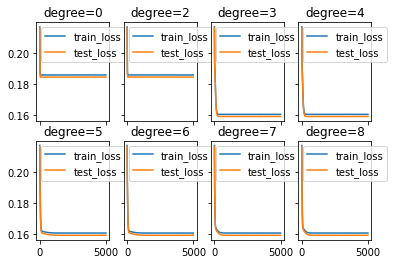

In [12]:
steps=np.arange(5001)
fig, axs = plt.subplots(2,4,sharex=True, sharey=True)
for n in range(8):
    if n==0:
        model,loss_list,loss_test_list=train_fn(x_train,x_test,y_train,y_test,n+1)
        axs[0,0].plot(steps,loss_list,label='train_loss')
        axs[0,0].plot(steps,loss_test_list,label='test_loss')
        axs[0,0].set_title("degree={}".format(n+1))
        axs[0,0].legend()
        x_train_new=deepcopy(x_train)
        x_test_new=deepcopy(x_test)
    else:
        x_train_new=torch.cat((x_train_new,x_train.pow(n+1)),1)
        x_test_new=torch.cat((x_test_new,x_test.pow(n+1)),1)
        model,loss_list,loss_test_list=train_fn(x_train_new,x_test_new,y_train,y_test,n+1)
        if n<4:
            axs[0,n].plot(steps,loss_list,label='train_loss')
            axs[0,n].plot(steps,loss_test_list,label='test_loss')
            axs[0,n].set_title("degree={}".format(n+1))
            axs[0,n].legend()
        else:
            axs[1,n-4].plot(steps,loss_list,label='train_loss')
            axs[1,n-4].plot(steps,loss_test_list,label='test_loss')
            axs[1,n-4].set_title("degree={}".format(n+1))
            axs[1,n-4].legend()        
plt.show()

#### 验证，没有出现过拟合现象，将原函数拟合地相对较好

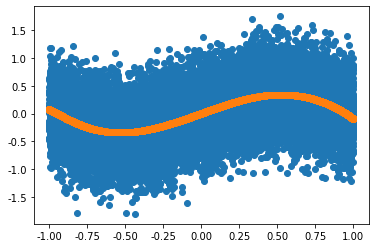

In [20]:
y_pre=model(x_test_new)
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_pre.detach().numpy())
#y_pre

### 五折交叉验证(5-folds cross-validation)
思路：调用sklearn中的kFold函数将数据集划分成5等分，每一份分别作为测试集，剩余的数据集作为训练集对模型n=....的模型进行训练，在测试集上取mse的平均，得到n个loss，（最好用字典存储n和loss），选择loss最小的模型
from sklearn.model_selection import KFold
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold

In [45]:
def totensor(train_x,test_x,train_y,test_y):
    x_train=torch.tensor(train_x,dtype=torch.float32).reshape(-1,1)
    x_test=torch.tensor(test_x,dtype=torch.float32).reshape(-1,1)
    y_train=torch.tensor(train_y,dtype=torch.float32).reshape(-1,1)
    y_test=torch.tensor(test_y,dtype=torch.float32).reshape(-1,1)
    return x_train,x_test,y_train,y_test

In [52]:
loss_dict={}#存储各n次多项式的损失
for n in range(8):
    if n==0:
        loss=[]
        for i,j in KFold(n_splits=5).split(x):
            train=i
            test=j
            train_x,test_x,train_y,test_y=x[train],x[test],y[train],y[test]
            #转化成tensor
            x_train,x_test,y_train,y_test=totensor(train_x,test_x,train_y,test_y)
            model,loss_list,loss_test_list=train_fn(x_train,x_test,y_train,y_test,n+1)
            loss.append(min(loss_test_list).detach().numpy())
        loss_dict[n+1]=sum(loss)/len(loss)
        x_train_new=deepcopy(x_train)
        x_test_new=deepcopy(x_test)
    else:
        loss=[]
        for i,j in KFold(n_splits=5).split(x):
            train=i
            test=j
            train_x,test_x,train_y,test_y=x[train],x[test],y[train],y[test]
            x_train,x_test,y_train,y_test=totensor(train_x,test_x,train_y,test_y)
            x_train_new=deepcopy(x_train)
            x_test_new=deepcopy(x_test)
            for _ in range(n):
                x_train_new=torch.cat((x_train_new,x_train.pow(n+1)),1)
                x_test_new=torch.cat((x_test_new,x_test.pow(n+1)),1)
            model,loss_list,loss_test_list=train_fn(x_train_new,x_test_new,y_train,y_test,n+1)                
            loss.append(min(loss_test_list).detach().numpy())
        loss_dict[n+1]=sum(loss)/len(loss)

In [53]:
loss_dict#当n=3时，测试集误差最小，故通过交叉验证可得，n=3时结果最好

{1: 0.1856681376695633,
 2: 0.18567658364772796,
 3: 0.1602317899465561,
 4: 0.1856658786535263,
 5: 0.1620688796043396,
 6: 0.1856600284576416,
 7: 0.1644978106021881,
 8: 0.1856546074151993}

### early stopping方法
1. 将原始的训练数据集划分成训练集和验证集（split）
2. 只在训练集上进行训练，并每个一个周期计算模型在验证集上的误差，例如，每15次epoch（mini batch训练中的一个周期）(patience)
3. 当模型在验证集上的误差比上一次训练结果差的时候停止训练
4. 使用上一次迭代结果中的参数作为模型的最终参数


In [54]:
def train_earlystopping(x_train,x_valid,y_train,y_valid,degree):
    '''
    degree 表示特征维度
    '''
    loss_list=[]
    loss_valid_list=[]
    lossf=nn.MSELoss()
    model=linear_model(degree)#模型初始化
    optimizer=optim.Adam(model.parameters(),lr=0.01)
    dic={}#定义字典记录上一个模型
    dic['last_model']=None
    dic['last_loss']=float('inf')
    for i in range(5001):
        out=model(x_train)
        out_pre=model(x_valid)
        loss=lossf(out,y_train)
        loss_list.append(loss)
        loss_valid=lossf(out_pre,y_valid)
        loss_valid_list.append(loss_valid)
        optimizer.zero_grad()#将网络中所有模型的参数设置为0
        loss.backward()
        optimizer.step()
        if i%15==0:
            print(i,loss.item(),loss_valid.item())
            if loss_valid.item()>dic['last_loss']:
                print('模型在{}时停止'.format(i-15))
                return dic['last_model']
            else:
                dic['last_model']=model
                dic['last_loss']=loss_valid.item()           
    print('模型没有早停')
    return model

In [55]:
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.75,random_state=2)
x_train,x_test,y_train,y_test=totensor(train_x,test_x,train_y,test_y)
model=train_earlystopping(x_train,x_test,y_train,y_test,1)

0 0.21708768606185913 0.21634845435619354
15 0.19453516602516174 0.19350358843803406
30 0.18672315776348114 0.1854322999715805
45 0.1860562413930893 0.184640571475029
60 0.1861024796962738 0.18467149138450623
模型在45时停止
